<a href="https://colab.research.google.com/github/ImranHossain1/ml-models/blob/main/AI_ML_all_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 📘 AI/ML Assignment 3
## Supervised Learning Models in Practice

**Total Marks: 100**  
**Submission Format:** Single Jupyter Notebook (`.ipynb`)

---
## 📌 General Instructions (Read Carefully)

- This assignment covers **Modules 13–18**.
- Use **Python and scikit-learn only**.
- Do NOT use AutoML, deep learning, or external ML libraries.
- Fix `random_state=42` wherever applicable.
- Plots must be labeled and readable.
- Do not delete or rename cells.

***Classification Dataset:*** https://www.kaggle.com/datasets/taweilo/loan-approval-classification-data/data

***Regresssion Dataset:*** https://www.kaggle.com/datasets/mirichoi0218/insurance

## 🔧 TODO 0: Environment Setup (5 Marks)
**Marks Breakdown:**
- Correct imports (3)
- Clean setup, no unused imports (2)


In [ ]:
# TODO: Import all necessary libraries here
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler, MinMaxScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split, GridSearchCV

# Regression models
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor

# classification
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier


from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    classification_report
)
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [ ]:
!git clone https://github.com/ImranHossain1/essensital_datasets.git

Cloning into 'essensital_datasets'...
remote: Enumerating objects: 4, done.
remote: Counting objects: 100% (4/4), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 4 (delta 0), reused 4 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (4/4), 729.62 KiB | 2.00 MiB/s, done.


# 🔵 PART A: Regression Task (45 Marks)
You will work with the provided **regression dataset**.


## TODO A1: Dataset Loading and Understanding (5 Marks)
**You must:**
- Load the dataset
- Show shape and column names
- Identify target variable

**Marks:** Data loading (2), Explanation (3)


In [ ]:
# TODO: Load regression dataset
insurance_dataset = "/content/essensital_datasets/insurance.csv"
insurance_df = pd.read_csv(insurance_dataset)

print("First 5 rows of Insurance dataset:")
print(insurance_df.head())

print("Shape of the data set: ", insurance_df.shape)
print("Columns of the data set: ", insurance_df.columns)

target_col = "charges"
features_col = insurance_df.drop(target_col, axis=1).columns
print("Target variable: ", target_col)
print("Features: ", features_col)

First 5 rows of Insurance dataset:
   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520
Shape of the data set:  (1338, 7)
Columns of the data set:  Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')
Target variable:  charges
Features:  Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region'], dtype='object')


## TODO A2: Exploratory Data Analysis (EDA) (5 Marks)
**You must:**
- Show descriptive statistics
- Plot correlation heatmap
- Plot at least one feature vs target

**Marks:** Plots (3), Interpretation (2)


In [ ]:
# TODO: Perform EDA
print("Descriptive Statistics:")
print(insurance_df.describe())
print("\n")

print("Data frame info:")
print(insurance_df.info())
print("\n")

print("Number of Unique varibales:")
print(insurance_df.nunique())
print("\n")

print("Number of Null Value:")
print(insurance_df.isnull().sum())



Descriptive Statistics:
               age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010


Data frame info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   cha

In [ ]:
# extract categorical variables
cat_var = [c for c in insurance_df.columns if c!=target_col and insurance_df[c].dtype=='O']
cat_df = insurance_df[cat_var].copy()

#  Label encoding for 'smoker'
le = LabelEncoder()
cat_df['smoker'] = le.fit_transform(cat_df['smoker'])

# One-hot encoding for 'sex' and 'region'
ohe = OneHotEncoder(drop='first', sparse_output=False)
ohe_features = ohe.fit_transform(cat_df[['sex', 'region']])
ohe_df = pd.DataFrame(ohe_features, columns=ohe.get_feature_names_out(['sex', 'region']))
final_cat_df = pd.concat([ohe_df, cat_df['smoker']], axis=1)

insurance_df.drop(cat_var, axis=1, inplace=True)
insurance_df = pd.concat([insurance_df, final_cat_df], axis=1)
insurance_df


,age,bmi,children,charges,sex_male,region_northwest,region_southeast,region_southwest,smoker
0,19,27.900,0,16884.92400,0.0,0.0,0.0,1.0,1
1,18,33.770,1,1725.55230,1.0,0.0,1.0,0.0,0
2,28,33.000,3,4449.46200,1.0,0.0,1.0,0.0,0
3,33,22.705,0,21984.47061,1.0,1.0,0.0,0.0,0
4,32,28.880,0,3866.85520,1.0,1.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,1.0,1.0,0.0,0.0,0
1334,18,31.920,0,2205.98080,0.0,0.0,0.0,0.0,0
1335,18,36.850,0,1629.83350,0.0,0.0,1.0,0.0,0
1336,21,25.800,0,2007.94500,0.0,0.0,0.0,1.0,0


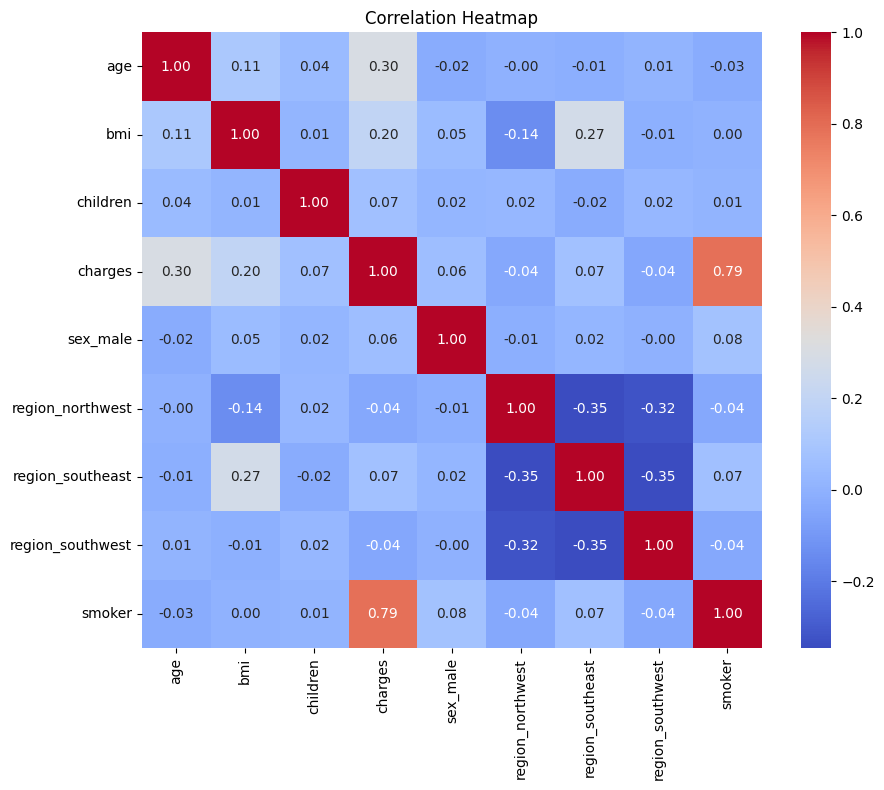

In [ ]:
#  2. Plot correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(insurance_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


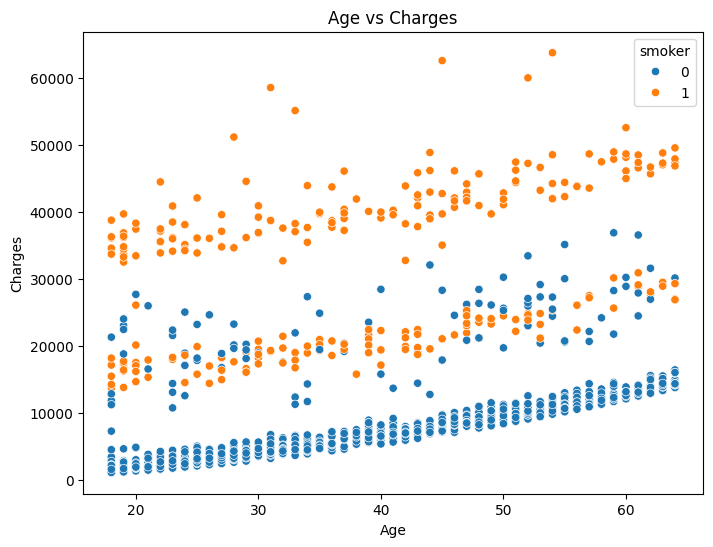

In [ ]:
# 3. Plot at least one feature vs target
plt.figure(figsize=(8,6))
sns.scatterplot(data=insurance_df, x='age', y='charges', hue='smoker')
plt.title("Age vs Charges")
plt.xlabel("Age")
plt.ylabel("Charges")
plt.show()

## TODO A3: Feature Preparation (5 Marks)
**You must:**
- Train-test split
- Scaling (if applicable)

**Marks:** Correct split (3), Explanation (2)


In [ ]:
# TODO: Prepare features
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(
    insurance_df.drop(target_col, axis=1), insurance_df[target_col], test_size=0.2, random_state=42
)

print("Training set size: ", X_train_reg.shape)
print("Test set size: ", X_test_reg.shape)

Training set size:  (1070, 8)
Test set size:  (268, 8)


In [ ]:
# Scaling'
std_scaler = StandardScaler()
X_train_reg_scaled = std_scaler.fit_transform(X_train_reg)
X_test_reg_scaled = std_scaler.transform(X_test_reg)
X_train_reg_scaled

array([[ 0.47222651, -1.75652513,  0.73433626, ..., -0.59966106,
        -0.5723141 , -0.50874702],
       [ 0.54331294, -1.03308239, -0.91119211, ..., -0.59966106,
        -0.5723141 , -0.50874702],
       [ 0.8987451 , -0.94368672, -0.91119211, ...,  1.66760869,
        -0.5723141 , -0.50874702],
       ...,
       [ 1.3252637 , -0.89153925, -0.91119211, ..., -0.59966106,
        -0.5723141 , -0.50874702],
       [-0.16755139,  2.82086429,  0.73433626, ..., -0.59966106,
         1.74729228,  1.96561348],
       [ 1.1120044 , -0.10932713, -0.91119211, ..., -0.59966106,
         1.74729228, -0.50874702]])

## TODO A4: Multiple Linear Regression (8 Marks)
**You must:**
- Train model
- Evaluate using RMSE, MAE, R²

**Marks:** Model (4), Metrics (4)


In [ ]:
# TODO: Multiple Linear Regression
model = LinearRegression()
model.fit(X_train_reg_scaled, y_train_reg)

y_train_pred_linear = model.predict(X_train_reg_scaled)
y_test_pred_linear = model.predict(X_test_reg_scaled)

In [ ]:
def regression_metrics(y_true, y_pred, label='Model'):
  mae = mean_absolute_error(y_true, y_pred)
  mse = mean_squared_error(y_true, y_pred)
  rmse = np.sqrt(mse)
  r2 = r2_score(y_true, y_pred)

  print(f'=== {label} ====')
  print('MAE: ', mae)
  print('RMSE: ', rmse)
  print('R2 : ', r2)
  print()

In [ ]:
regression_metrics(y_train_reg, y_train_pred_linear, label='Linear Regression (Train)')
regression_metrics(y_test_reg, y_test_pred_linear, label='Linear Regression (Test)')

=== Linear Regression (Train) ====
MAE:  4208.234572492225
RMSE:  6105.545160099847
R2 :  0.7417255854683333

=== Linear Regression (Test) ====
MAE:  4181.1944737536505
RMSE:  5796.284659276274
R2 :  0.7835929767120722



## TODO A5: Polynomial Regression (7 Marks)
**You must:**
- Apply polynomial features
- Compare with linear regression

**Marks:** Implementation (4), Comparison (3)


In [ ]:
# TODO: Polynomial Regression
poly = PolynomialFeatures(degree=2, include_bias=False)

X_train_poly = poly.fit_transform(X_train_reg_scaled)
X_test_poly = poly.transform(X_test_reg_scaled)

poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train_reg)

y_train_pred_poly = poly_model.predict(X_train_poly)
y_test_pred_poly = poly_model.predict(X_test_poly)

regression_metrics(y_train_reg, y_train_pred_poly, label='Linear Regression (Train) for Polynomial feature')
regression_metrics(y_test_reg, y_test_pred_poly, label='Linear Regression (Test) for Polynomial feature')



=== Linear Regression (Train) for Polynomial feature ====
MAE:  2892.149840096791
RMSE:  4778.187802539188
R2 :  0.8418173231535121

=== Linear Regression (Test) for Polynomial feature ====
MAE:  2729.5001336394544
RMSE:  4551.132385233193
R2 :  0.866583090316484



## Comparison

- The **polynomial regression model** outperforms the simple linear regression model across all evaluation metrics.
- Both **MAE and RMSE decrease** on the training and test sets, indicating improved prediction accuracy.
- The **test R² score increases from ~0.78 to ~0.87**, showing that the polynomial model explains a greater proportion of variance in insurance charges.
- The **similar performance on training and test data** suggests that the model generalizes well and does not suffer from significant overfitting.
- Overall, incorporating polynomial features helps capture **non-linear relationships** in the data, resulting in a more accurate and reliable model.


## TODO A6: Support Vector Regression (7 Marks)
**You must:**
- Train SVR (RBF kernel)
- Evaluate performance
- Justify kernel choice

**Marks:** Model (4), Justification (3)


In [ ]:
def evaluate_svm_c_gamma(X_train, X_test, y_train, y_test, C_values, gamma_values):
    results = []
    for C in C_values:
        for gamma in gamma_values:
            model = SVR(kernel='rbf', C=C, gamma=gamma, epsilon=0.1)
            model.fit(X_train_reg_scaled, y_train_reg)
            y_pred = model.predict(X_test_reg_scaled)
            acc = r2_score(y_test_reg, y_pred)
            results.append({'C': C, 'gamma': gamma, 'accuracy': acc})
    return pd.DataFrame(results)

C_values = [0.1, 1.0, 10.0, 100.0, 1000.0, 2000]
gamma_values = ['scale', 0.01, 0.1, 1.0, 10]

df_hyper = evaluate_svm_c_gamma(X_train_reg_scaled, X_test_reg_scaled,
                                y_train_reg, y_test_reg,
                                C_values, gamma_values)
df_hyper.sort_values(by='accuracy', ascending=False)

,C,gamma,accuracy
27,2000.0,0.1,0.827897
25,2000.0,scale,0.821564
22,1000.0,0.1,0.758117
20,1000.0,scale,0.746887
26,2000.0,0.01,0.631228
21,1000.0,0.01,0.578709
28,2000.0,1.0,0.388040
17,100.0,0.1,0.269723
15,100.0,scale,0.245343
23,1000.0,1.0,0.218597


In [ ]:
# TODO: Support Vector Regression
svr_model = SVR(kernel='rbf', C=2000, gamma=0.1, epsilon=0.1)
svr_model.fit(X_train_reg_scaled, y_train_reg)

y_train_pred_svr = svr_model.predict(X_train_reg_scaled)
y_test_pred_svr = svr_model.predict(X_test_reg_scaled)

regression_metrics(y_train_reg, y_train_pred_svr, label='Support Vector Regression (Train)')
regression_metrics(y_test_reg, y_test_pred_svr, label='Support Vector Regression (Test)')

=== Support Vector Regression (Train) ====
MAE:  2200.43598346601
RMSE:  5275.318553464333
R2 :  0.8071898600769902

=== Support Vector Regression (Test) ====
MAE:  2135.0066210091227
RMSE:  5169.016085984441
R2 :  0.8278972907512503



### Hyperparameter Selection Justification

- **C = 2000:** A higher C value allows the SVR model to fit complex patterns in the data more closely. In the experiments, increasing C consistently improved the R² score, and C = 2000 produced the best test performance, indicating reduced underfitting.

- **gamma = 0.1:** This value provides a good balance between model flexibility and generalization. Lower gamma values were too smooth and failed to capture non-linear relationships, while higher gamma values led to overfitting and poorer test performance.

- **epsilon = 0.1:** An epsilon value of 0.1 defines a reasonable margin of tolerance for prediction errors, helping the model ignore minor noise in the data while still learning important patterns, resulting in stable and accurate predictions.

## TODO A7: Random Forest Regressor (8 Marks)
**You must:**
- Train Random Forest
- Evaluate model

**Marks:** Model (4), Evaluation (4)


In [ ]:
from sklearn.ensemble import RandomForestRegressor

n_estimators_list = [100, 200, 300]
max_depth_list = [None, 10, 20, 30]

results = []

for n in n_estimators_list:
    for d in max_depth_list:
        rf = RandomForestRegressor(
            n_estimators=n,
            max_depth=d,
            random_state=42
        )
        rf.fit(X_train_reg, y_train_reg)
        y_pred = rf.predict(X_test_reg)
        r2 = r2_score(y_test_reg, y_pred)
        results.append({
            'n_estimators': n,
            'max_depth': d,
            'R2': r2
        })

rf_results = pd.DataFrame(results)
rf_results.sort_values(by='R2', ascending=False)


,n_estimators,max_depth,R2
5,200,10.0,0.866787
9,300,10.0,0.866328
1,100,10.0,0.865709
2,100,20.0,0.864759
3,100,30.0,0.864755
0,100,NaN,0.864755
7,200,30.0,0.864231
4,200,NaN,0.864231
6,200,20.0,0.864222
10,300,20.0,0.863851


In [ ]:
# TODO: Random Forest Regressor
rf_model = RandomForestRegressor(
    n_estimators=200,
    random_state=42,
    max_depth=10
)

rf_model.fit(X_train_reg, y_train_reg)
y_train_pred_rf = rf_model.predict(X_train_reg)
y_test_pred_rf = rf_model.predict(X_test_reg)

regression_metrics(y_train_reg, y_train_pred_rf, label='Random Forest (Train)')
regression_metrics(y_test_reg, y_test_pred_rf, label='Random Forest (Test)')

=== Random Forest (Train) ====
MAE:  1258.3598628488878
RMSE:  2276.419545897005
R2 :  0.9640964739917484

=== Random Forest (Test) ====
MAE:  2516.216358478682
RMSE:  4547.652155263779
R2 :  0.8667870588921934



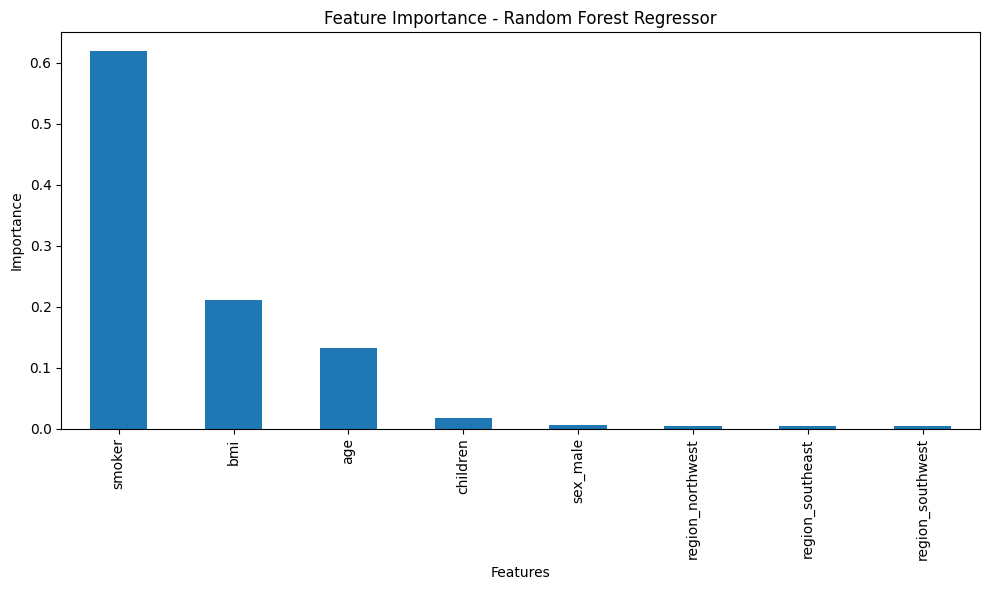

In [ ]:
feature_importance = pd.Series(
    rf_model.feature_importances_,
    index=X_train_reg.columns
).sort_values(ascending=False)

plt.figure(figsize=(10, 6))
feature_importance.plot(kind='bar')
plt.title("Feature Importance - Random Forest Regressor")
plt.xlabel("Features")
plt.ylabel("Importance")
plt.tight_layout()
plt.show()

# 🟠 PART B: Classification Task (45 Marks)
You will work with the provided **classification dataset**.


## TODO B1: Dataset Understanding (5 Marks)
**You must:**
- Load dataset
- Show class distribution
- Comment on imbalance

**Marks:** Analysis (3), Explanation (2)


In [ ]:
# TODO: Load classification dataset
loan_dataset = "/content/essensital_datasets/loan_data.csv"
loan_df = pd.read_csv(loan_dataset)

# print(loan_df.head())

print("Shape of the data set: ", loan_df.shape)
print("Columns of the data set: ", loan_df.columns)

target_col = "loan_status"
features_col = loan_df.drop(target_col, axis=1).columns
print("Target variable: ", target_col)
print("Features: ", features_col)

print("First 5 rows of Loan dataset:")
loan_df.head()

Shape of the data set:  (45000, 14)
Columns of the data set:  Index(['person_age', 'person_gender', 'person_education', 'person_income',
       'person_emp_exp', 'person_home_ownership', 'loan_amnt', 'loan_intent',
       'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length',
       'credit_score', 'previous_loan_defaults_on_file', 'loan_status'],
      dtype='object')
Target variable:  loan_status
Features:  Index(['person_age', 'person_gender', 'person_education', 'person_income',
       'person_emp_exp', 'person_home_ownership', 'loan_amnt', 'loan_intent',
       'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length',
       'credit_score', 'previous_loan_defaults_on_file'],
      dtype='object')
First 5 rows of Loan dataset:


,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1


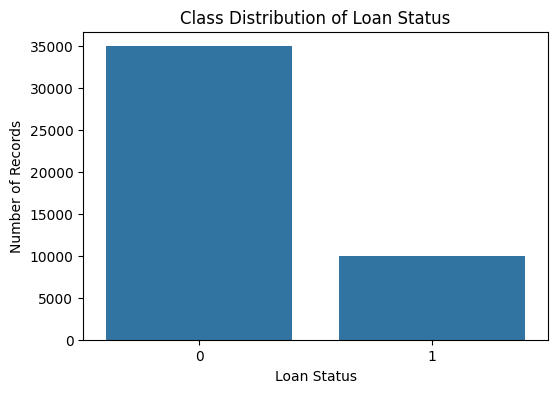

Class Counts:
 loan_status
0    35000
1    10000
Name: count, dtype: int64

Class Percentages:
 loan_status
0    77.78
1    22.22
Name: proportion, dtype: float64


In [ ]:
# Plot class distribution
plt.figure(figsize=(6,4))
sns.countplot(x='loan_status', data=loan_df)
plt.title("Class Distribution of Loan Status")
plt.xlabel("Loan Status")
plt.ylabel("Number of Records")
plt.show()

# Print counts and percentages
class_counts = loan_df['loan_status'].value_counts()
class_percentages = loan_df['loan_status'].value_counts(normalize=True) * 100

print("Class Counts:\n", class_counts)
print("\nClass Percentages:\n", class_percentages.round(2))

### Class Distribution and Imbalance

The target variable `loan_status` is not evenly distributed. Out of 45,000 records,  
35,000 samples (77.78%) belong to class `0`, while only 10,000 samples (22.22%) belong to class `1`.

This shows that the dataset is **imbalanced**, with many more examples of class `0` than class `1`.  
Because of this imbalance, a model may learn to predict the majority class more often and may not perform well on the minority class.


## TODO B2: Exploratory Data Analysis (5 Marks)
**You must:**
- Plot class counts
- Plot at least one feature vs class

**Marks:** Plots (5),


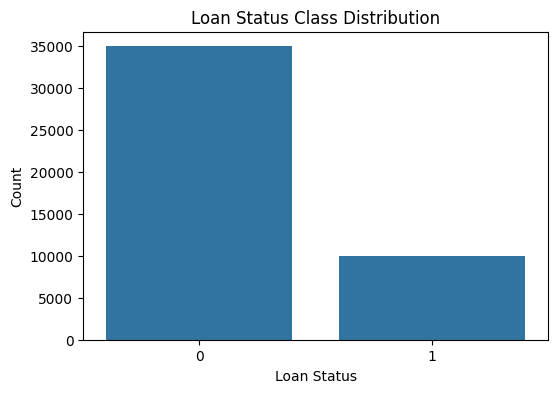

In [ ]:
# TODO: Classification EDA
# Plot class counts
plt.figure(figsize=(6,4))
sns.countplot(x='loan_status', data=loan_df)
plt.title("Loan Status Class Distribution")
plt.xlabel("Loan Status")
plt.ylabel("Count")
plt.show()

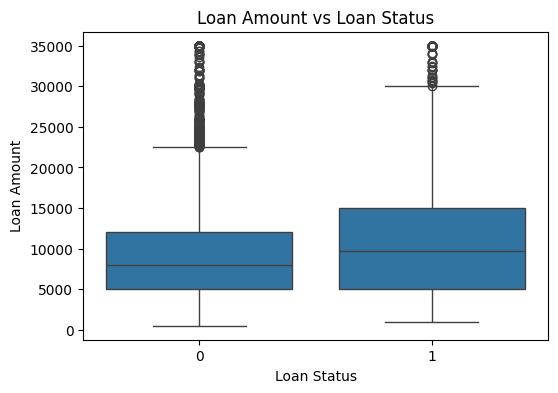

In [ ]:
# Plot at least one feature vs class

plt.figure(figsize=(6,4))
sns.boxplot(x='loan_status', y='loan_amnt', data=loan_df)
plt.title("Loan Amount vs Loan Status")
plt.xlabel("Loan Status")
plt.ylabel("Loan Amount")
plt.show()

## TODO B3: Feature Preparation (5 Marks)
**You must:**
- Encoding (if needed)
- Scaling
- Train-test split with stratification




In [ ]:
cat_var = [c for c in loan_df.columns if c!=target_col and loan_df[c].dtype=='O']
cat_df = loan_df[cat_var].copy()

#  Label encoding for 'previous_loan_defaults_on_file'
le = LabelEncoder()
cat_df['previous_loan_defaults_on_file'] = le.fit_transform(cat_df['previous_loan_defaults_on_file'])

# One-hot encoding for 'person_gender', 'person_education', 'person_home_ownership' and 'loan_intent'
ohe = OneHotEncoder(drop='first', sparse_output=False)
ohe_features = ohe.fit_transform(cat_df[['person_gender', 'person_education', 'person_home_ownership', 'loan_intent']])
ohe_df = pd.DataFrame(ohe_features, columns=ohe.get_feature_names_out(['person_gender', 'person_education', 'person_home_ownership', 'loan_intent']))
final_cat_df = pd.concat([ohe_df, cat_df['previous_loan_defaults_on_file']], axis=1)

loan_df.drop(cat_var, axis=1, inplace=True)
loan_df = pd.concat([loan_df, final_cat_df], axis=1)
loan_df

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status,person_gender_male,...,person_education_Master,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,previous_loan_defaults_on_file
0,22.0,71948.0,0,35000.0,16.02,0.49,3.0,561,1,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0
1,21.0,12282.0,0,1000.0,11.14,0.08,2.0,504,0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1
2,25.0,12438.0,3,5500.0,12.87,0.44,3.0,635,1,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0
3,23.0,79753.0,0,35000.0,15.23,0.44,2.0,675,1,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0
4,24.0,66135.0,1,35000.0,14.27,0.53,4.0,586,1,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,27.0,47971.0,6,15000.0,15.66,0.31,3.0,645,1,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0
44996,37.0,65800.0,17,9000.0,14.07,0.14,11.0,621,1,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0
44997,33.0,56942.0,7,2771.0,10.02,0.05,10.0,668,1,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0
44998,29.0,33164.0,4,12000.0,13.23,0.36,6.0,604,1,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0


In [ ]:
X_train_cls, X_test_cls, y_train_cls, y_test_cls = train_test_split(
  loan_df.drop(target_col, axis=1), loan_df[target_col], test_size=0.2, random_state=42, stratify=loan_df[target_col]
)

print("Training set size: ", X_train_cls.shape)
print("Test set size: ", X_test_cls.shape)

Training set size:  (36000, 22)
Test set size:  (9000, 22)


In [ ]:
# Scaling
std_scaler = StandardScaler()
X_train_scaled_cls = std_scaler.fit_transform(X_train_cls)
X_test_scaled_cls = std_scaler.transform(X_test_cls)
X_train_scaled_cls

array([[-0.62250234, -0.25660041, -0.56159695, ..., -0.44663209,
         2.18640043,  0.98549409],
       [-0.78792093, -0.41126893, -0.56159695, ..., -0.44663209,
         2.18640043,  0.98549409],
       [ 0.20459064,  1.90234248,  0.26292019, ..., -0.44663209,
         2.18640043,  0.98549409],
       ...,
       [ 0.37000923, -0.09207609,  0.59272705, ..., -0.44663209,
        -0.45737276,  0.98549409],
       [ 0.37000923, -0.48532385,  0.42782362, ..., -0.44663209,
        -0.45737276, -1.01471943],
       [-0.12624655, -0.37516656, -0.06688666, ..., -0.44663209,
        -0.45737276, -1.01471943]])

## TODO B4: Logistic Regression with L2 (8 Marks)
**You must:**
- Train Logistic Regression
- Evaluate using Accuracy, Precision, Recall
- Show Confusion Matrix

**Marks:** Model (4), Metrics (4)


In [ ]:
def classification_metrics(y_true, y_pred, label='Model'):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)

    print(f'=== {label} ===')
    print('Accuracy :', accuracy)
    print('Precision:', precision)
    print('Recall   :', recall)
    print()

    return confusion_matrix(y_true, y_pred)

=== Logistic Regression (L2) ===
Accuracy : 0.8997777777777778
Precision: 0.7895569620253164
Recall   : 0.7485



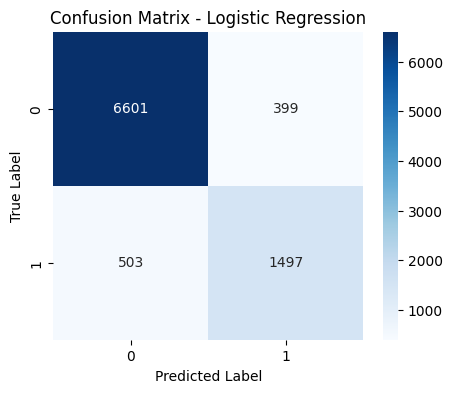

In [ ]:
# TODO: Logistic Regression
clf = LogisticRegression(max_iter=100)
clf.fit(X_train_scaled_cls, y_train_cls)

y_test_pred_log = clf.predict(X_test_scaled_cls)

cm = classification_metrics(y_test_cls, y_test_pred_log, label='Logistic Regression (L2)')

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

## TODO B5: Support Vector Machine (7 Marks)
**You must:**
- Train SVM (Linear or RBF)
- Evaluate

**Marks:** Model (4), Evaluation (3)


=== Support Vector Machine using Linear ===
Accuracy : 0.9004444444444445
Precision: 0.7939297124600639
Recall   : 0.7455



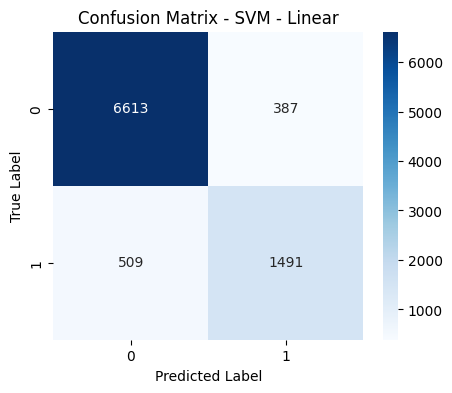

In [ ]:
# TODO: SVM Classification
svm_linear = SVC(kernel='linear', C=1.0, random_state=42)
svm_linear.fit(X_train_scaled_cls, y_train_cls)

y_pred_svc_linear = svm_linear.predict(X_test_scaled_cls)
cm = classification_metrics(y_test_cls, y_pred_svc_linear, label='Support Vector Machine using Linear')

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - SVM - Linear")
plt.show()

In [ ]:
def evaluate_svm_c_gamma(kernel, X_train, X_test, y_train, y_test, C_values, gamma_values):
    results = []
    for C in C_values:
        for gamma in gamma_values:
            model = SVC(kernel=kernel, C=C, gamma=gamma, random_state=42)
            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)
            acc = accuracy_score(y_test, y_pred)
            results.append({'C': C, 'gamma': gamma, 'accuracy': acc})
    return pd.DataFrame(results)

C_values = [0.1, 1.0, 10.0]
gamma_values = ['scale', 0.01, 0.1, 1.0]

df_hyper = evaluate_svm_c_gamma('rbf', X_train_scaled_cls, X_test_scaled_cls,
                                y_train_cls, y_test_cls,
                                C_values, gamma_values)
df_hyper.sort_values('accuracy', ascending=False)

,C,gamma,accuracy
9,10.0,0.01,0.917111
4,1.0,scale,0.916000
6,1.0,0.1,0.915222
8,10.0,scale,0.914778
5,1.0,0.01,0.914222
10,10.0,0.1,0.912667
0,0.1,scale,0.909444
2,0.1,0.1,0.906222
1,0.1,0.01,0.905889
11,10.0,1.0,0.847889


=== Support Vector Machine using RBF ===
Accuracy : 0.9171111111111111
Precision: 0.8456449834619625
Recall   : 0.767



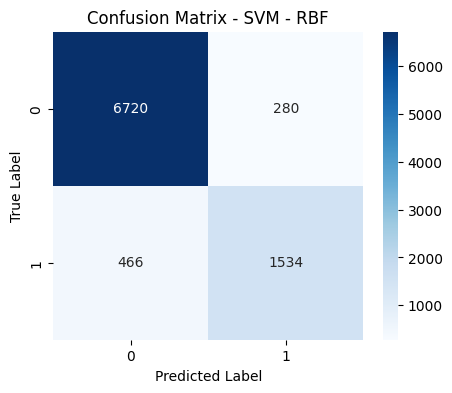

In [ ]:
svm_rbf = SVC(kernel='rbf', C=10.0, gamma=0.01, random_state=42)
svm_rbf.fit(X_train_scaled_cls, y_train_cls)

y_pred_svm_rbf = svm_rbf.predict(X_test_scaled_cls)
cm = classification_metrics(y_test_cls, y_pred_svm_rbf, label='Support Vector Machine using RBF')

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - SVM - RBF")
plt.show()

## TODO B6: Naive Bayes (5 Marks)
**You must:**
- Choose correct NB variant



=== Gaussian Naive Bayes ===
Accuracy : 0.806
Precision: 0.6567901234567901
Recall   : 0.266



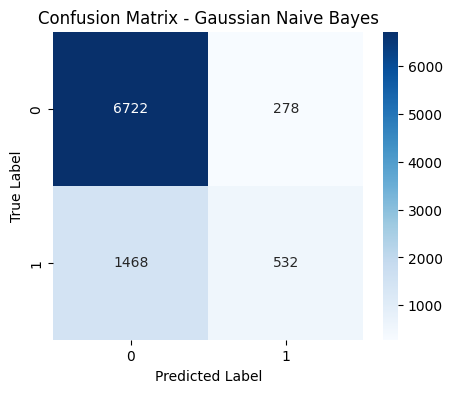

In [ ]:
# TODO: Naive Bayes
gnb = GaussianNB()
gnb.fit(X_train_cls, y_train_cls)
y_pred_gnb = gnb.predict(X_test_cls)
cm = classification_metrics(y_test_cls, y_pred_gnb, label='Gaussian Naive Bayes')

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Gaussian Naive Bayes")
plt.show()

=== Multinomial Naive Bayes ===
Accuracy : 0.6564444444444445
Precision: 0.3573667711598746
Recall   : 0.684



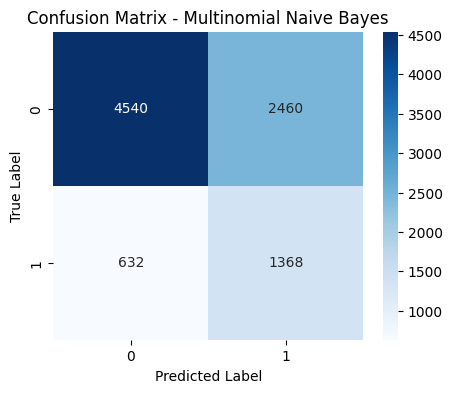

In [ ]:
mlb = MultinomialNB()
mlb.fit(X_train_cls, y_train_cls)
y_pred_mlb = mlb.predict(X_test_cls)
cm = classification_metrics(y_test_cls, y_pred_mlb, label='Multinomial Naive Bayes')

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Multinomial Naive Bayes")
plt.show()

=== Bernoulli Naive Bayes ===
Accuracy : 0.8232222222222222
Precision: 0.5982700624699664
Recall   : 0.6225



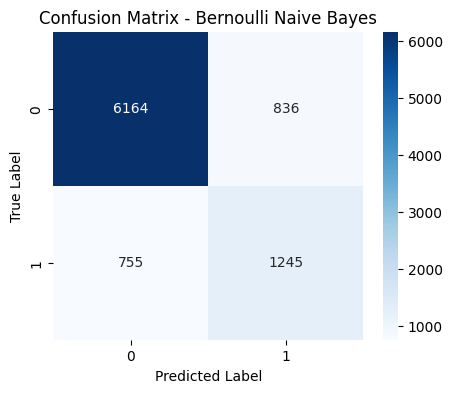

In [ ]:
bnb = BernoulliNB()
bnb.fit(X_train_cls, y_train_cls)
y_pred_bnb = bnb.predict(X_test_cls)
cm = classification_metrics(y_test_cls, y_pred_bnb, label='Bernoulli Naive Bayes')

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Bernoulli Naive Bayes")
plt.show()

**Bernoulli Naive Bayes** should be used.  
It provides the **best balance** between accuracy, precision, and recall compared to the other models.  
Gaussian NB has very low recall, while Multinomial NB sacrifices accuracy for recall.

## TODO B7: K-Nearest Neighbors (5 Marks)
**You must:**
- Try multiple K values
- Plot accuracy vs K

**Marks:** Experiment (3), Plot & choice (2)


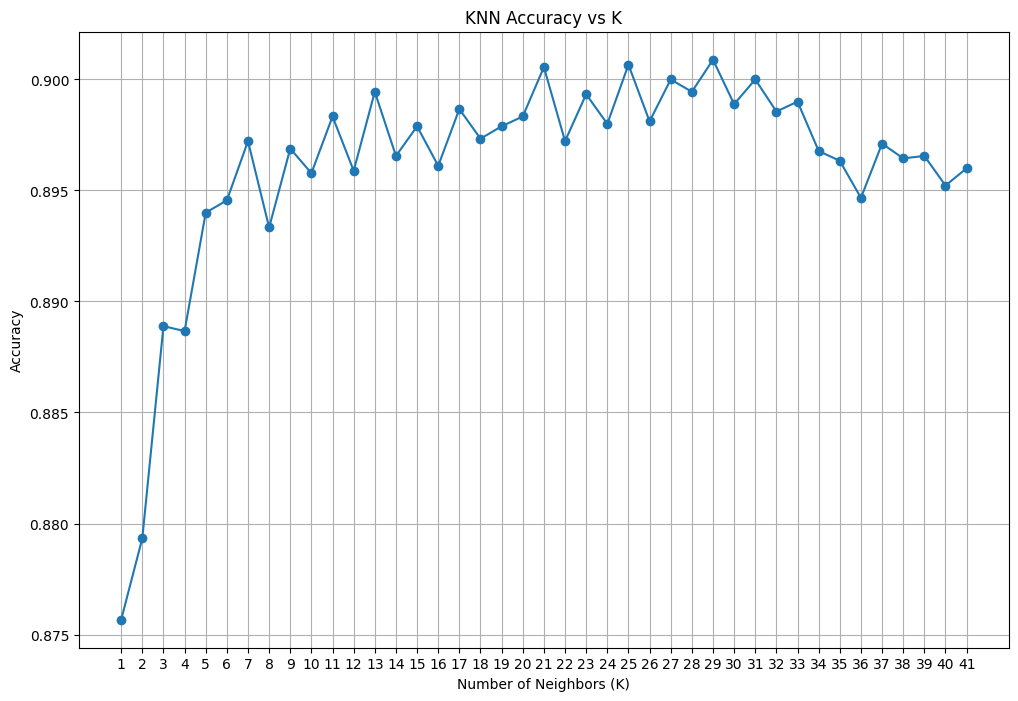

In [ ]:
k_values = range(1,42)
accs = []

for k in k_values:
  model = KNeighborsClassifier(n_neighbors=k)
  model.fit(X_train_scaled_cls, y_train_cls)
  pred = model.predict(X_test_scaled_cls)
  accs.append(accuracy_score(y_test_cls, pred))

plt.figure(figsize=(12,8))
plt.plot(k_values, accs, marker='o')
plt.xlabel("Number of Neighbors (K)")
plt.ylabel("Accuracy")
plt.title("KNN Accuracy vs K")
plt.xticks(k_values)
plt.grid(True)
plt.show()

In [ ]:
results_df = pd.DataFrame({
    "K": list(range(1, 42)),
    "Accuracy": accs
})

results_df_sorted = results_df.sort_values(by="Accuracy", ascending=False)
results_df_sorted.head()

,K,Accuracy
28,29,0.900889
24,25,0.900667
20,21,0.900556
26,27,0.900000
30,31,0.900000


=== K-Nearest Neighbors ===
Accuracy : 0.9008888888888889
Precision: 0.8528662420382166
Recall   : 0.6695



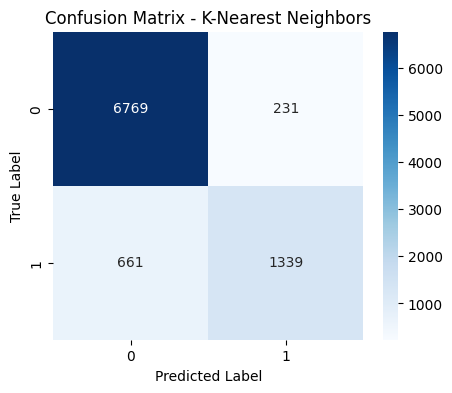

In [ ]:
# TODO: KNN
clf = KNeighborsClassifier(n_neighbors=29, metric="minkowski", p=2)
clf.fit(X_train_scaled_cls, y_train_cls)
y_pred_knn = clf.predict(X_test_scaled_cls)
cm = classification_metrics(y_test_cls, y_pred_knn, label='K-Nearest Neighbors')

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - K-Nearest Neighbors")
plt.show()

I chose **K = 29** because it achieved the **highest accuracy (0.900889)** among all tested values of K.
This indicates that the model performs best at this neighborhood size on the test data.
Additionally, K = 29 lies in a stable range where accuracy is consistently high, reducing the risk of overfitting compared to smaller K values.


## TODO B8: Random Forest Classifier (5 Marks)
**You must:**
- Train model
- Show feature importance

**Marks:** Model (3), Interpretation (2)


In [ ]:
param_grid={
    "n_estimators": [100,150,175,200],
    "max_depth": [None, 5, 10, 15],
    "min_samples_split": [2,3,5],
    "max_features": ["sqrt", "log2"]
}

#GridSearchCV for Tuning
grid_rf = GridSearchCV(
    RandomForestClassifier(random_state=42),
    param_grid,
    cv=5,
    scoring="f1",
    n_jobs=-1
)

grid_rf.fit(X_train_scaled_cls, y_train_cls)

print("Best parameters found:")
print(grid_rf.best_params_)

Best parameters found:
{'max_depth': None, 'max_features': 'sqrt', 'min_samples_split': 3, 'n_estimators': 175}


=== Random Forest ===
Accuracy : 0.9297777777777778
Precision: 0.8981373690337602
Recall   : 0.7715



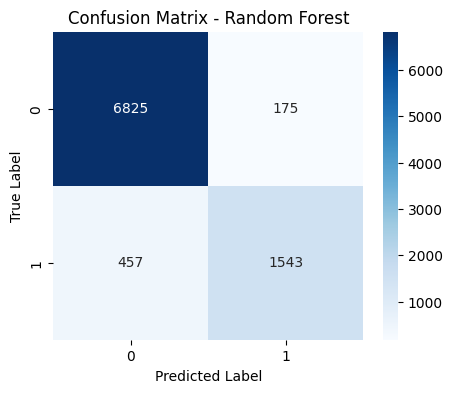

In [ ]:
best_rf = grid_rf.best_estimator_
y_pred_rf = best_rf.predict(X_test_scaled_cls)

cm = classification_metrics(y_test_cls, y_pred_rf, label='Random Forest')
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Random Forest")
plt.show()

Hyperparameter tuning helps identify the optimal combination of model parameters that maximizes performance rather than relying on default settings. Using GridSearchCV, the model is systematically evaluated across multiple parameter values with cross-validation, reducing overfitting and improving generalization. This results in a more accurate and robust Random Forest model with better predictive performance on unseen data.

In [ ]:
feature_importance = pd.DataFrame({
    "Feature": X_train_cls.columns,
    "Importance": best_rf.feature_importances_
})

# Sort by importance
feature_importance = feature_importance.sort_values(
    by="Importance", ascending=False
)

feature_importance

,Feature,Importance
21,previous_loan_defaults_on_file,0.231157
5,loan_percent_income,0.167915
4,loan_int_rate,0.158406
1,person_income,0.120418
3,loan_amnt,0.057710
15,person_home_ownership_RENT,0.056350
7,credit_score,0.053020
0,person_age,0.029980
2,person_emp_exp,0.026840
6,cb_person_cred_hist_length,0.024795


# 🧠 Final Reflection (5 Marks)
**Answer briefly:**
- Best regression model and why
- Best classification model and why
- One real-world deployment scenario


In [ ]:
reg_results = pd.DataFrame({
    "Model": [
        "Multiple Linear Regression",
        "Polynomial Regression (Degree 2)",
        "Support Vector Regression",
        "Random Forest Regressor"
    ],
    "Test_R2_Score": [
        r2_score(y_test_reg, y_test_pred_linear),
        r2_score(y_test_reg, y_test_pred_poly),
        r2_score(y_test_reg, y_test_pred_svr),
        r2_score(y_test_reg, y_test_pred_rf)
    ]
})

reg_results.sort_values(by="Test_R2_Score", ascending=False)

,Model,Test_R2_Score
3,Random Forest Regressor,0.866787
1,Polynomial Regression (Degree 2),0.866583
2,Support Vector Regression,0.827897
0,Multiple Linear Regression,0.783593


The **Random Forest Regressor** is the best model, achieving the highest test R² score of **0.867**, indicating it explains the most variance in insurance charges. Its ensemble approach captures non-linear relationships and interactions better than linear or polynomial regression. This makes it more robust and accurate for predicting complex patterns in the dataset.


In [ ]:
classification_results = pd.DataFrame({
     "Model": [
        "Logistic Regression",
        "SVM Classification (Linear)",
        "SVM Classification (rbf)",
        "Gaussian Naive Bayes",
        "Multinomial Naive Bayes",
        "Bernoulli Naive Bayes",
        "K-Nearest Neighbors",
        "Random Forest Classifier",
    ],
    "Accuracy Score": [
        accuracy_score(y_test_cls, y_test_pred_log),
        accuracy_score(y_test_cls, y_pred_svc_linear),
        accuracy_score(y_test_cls, y_pred_svm_rbf),
        accuracy_score(y_test_cls, y_pred_gnb),
        accuracy_score(y_test_cls, y_pred_mlb),
        accuracy_score(y_test_cls, y_pred_bnb),
        accuracy_score(y_test_cls, y_pred_knn),
        accuracy_score(y_test_cls, y_pred_rf),
    ],
    "Precision Score": [
        precision_score(y_test_cls, y_test_pred_log),
        precision_score(y_test_cls, y_pred_svc_linear),
        precision_score(y_test_cls, y_pred_svm_rbf),
        precision_score(y_test_cls, y_pred_gnb),
        precision_score(y_test_cls, y_pred_mlb),
        precision_score(y_test_cls, y_pred_bnb),
        precision_score(y_test_cls, y_pred_knn),
        precision_score(y_test_cls, y_pred_rf),
    ],
    "Recall Score": [
        recall_score(y_test_cls, y_test_pred_log),
        recall_score(y_test_cls, y_pred_svc_linear),
        recall_score(y_test_cls, y_pred_svm_rbf),
        recall_score(y_test_cls, y_pred_gnb),
        recall_score(y_test_cls, y_pred_mlb),
        recall_score(y_test_cls, y_pred_bnb),
        recall_score(y_test_cls, y_pred_knn),
        recall_score(y_test_cls, y_pred_rf),
    ],
})

classification_results.sort_values(by="Accuracy Score", ascending=False)

,Model,Accuracy Score,Precision Score,Recall Score
7,Random Forest Classifier,0.929778,0.898137,0.7715
2,SVM Classification (rbf),0.917111,0.845645,0.7670
6,K-Nearest Neighbors,0.900889,0.852866,0.6695
1,SVM Classification (Linear),0.900444,0.793930,0.7455
0,Logistic Regression,0.899778,0.789557,0.7485
5,Bernoulli Naive Bayes,0.823222,0.598270,0.6225
3,Gaussian Naive Bayes,0.806000,0.656790,0.2660
4,Multinomial Naive Bayes,0.656444,0.357367,0.6840


The **Random Forest Classifier** is the best model, with the highest accuracy of **0.930** and strong precision (**0.899**) and recall (**0.772**). Its ensemble of decision trees effectively captures complex patterns and reduces overfitting compared to single models. This makes it the most reliable choice for predicting insurance charges categories in your dataset.


### Real-World Deployment Scenarios

1. **Insurance Policy Assessment**  
A real-world deployment scenario could be an insurance company using the **Random Forest Classifier** to automatically assess new policy applicants. By analyzing features like **age, BMI, smoking status, and region**, the model can classify applicants into **risk categories for expected medical charges**, enabling faster and more accurate **premium pricing** and **risk management decisions**.

2. **Loan Approval Platform**  
Another real-world deployment scenario could be a **loan approval platform** using the **Random Forest Classifier** to automatically assess new applicants’ **credit risk**. By analyzing features like **previous loan defaults, loan-to-income ratio, loan interest rate, and applicant income**, the model can classify applicants into **high- or low-risk categories**, enabling faster, more accurate **lending decisions** and **reducing default rates**.


## TODO: Write your reflection here

This assignment has been extremely helpful in reinforcing my understanding of all previously learned concepts. It allowed me to apply and compare different regression and classification models on real datasets, which helped clarify their strengths, limitations, and practical applications.

To further enhance understanding, it would be beneficial to have a single consolidated lecture that covers all regression models and all classification models. Such a lecture could systematically explain their differences, use cases, performance evaluation metrics, and feature importance interpretation, enabling a more comprehensive and comparative understanding of predictive modeling techniques.